### Importing necessary libraries

In [ ]:
# Data manipulation
import zipfile
import urllib.request
import pandas as pd
import numpy as np


# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1. Introduction

## 1.1. Data

Source: https://arlweb.msha.gov/OpenGovernmentData/DataSets/Accidents.zip

The dataset has been prepared from manual records of mine accidents in the year 2000-2022, collected from Mine Safety and Health Administration. Sensitive information have been excluded during the data encoding process. The final dataset has information on **255585 accidents**, each with **57 features**.

In [ ]:
# Step 1: Download the zip file
zip_url = "https://arlweb.msha.gov/OpenGovernmentData/DataSets/Accidents.zip"
urllib.request.urlretrieve(zip_url, "Accidents.zip")

# Step 2: Extract the target file from the zip file
with zipfile.ZipFile("Accidents.zip", "r") as zip_ref:
    file_names = zip_ref.namelist()
    target_file = [name for name in file_names if name.lower().endswith('.txt')]
    if len(target_file) > 0:
        zip_ref.extract(target_file[0], path="/content/extracted_files_directory")
    else:
        print("No text file found in the zip archive.")

# Step 3: Read the text file into a pandas DataFrame
file_path = "/content/extracted_files_directory/" + target_file[0]
df = pd.read_csv(file_path, delimiter="|", encoding='latin1')

<ipython-input-131-b911f15b71b3>:16: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|", encoding='latin1')


In [ ]:
df.head()

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,...,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND
0,100003,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",MPH,220132310045,3,"STRIP, QUARY, OPEN PIT",08/12/2013,...,2.0,0,N,08/19/2013,?,NO VALUE FOUND,NaN,Employee says he slipped off back of fuel truc...,NaN,M
1,100003,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",NaN,220230030038,30,MILL OPERATION/PREPARATION PLANT,12/24/2022,...,NaN,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,EE was carrying 5-gallon fuel cans up top the ...,NaN,M
2,100009,M00024,Legacy Vulcan Corp (Form:Vulcan Materials Co),L16168,"Vulcan Construction Materials, LLC",NaN,220053250019,3,"STRIP, QUARY, OPEN PIT",11/13/2005,...,13.0,0,N,12/01/2005,?,NO VALUE FOUND,NaN,2 employees were attempting to load troughing ...,320053360009,M
3,100011,M11763,Imerys S A,L17074,Imerys Pigments LLC,NaN,220062000052,30,MILL OPERATION/PREPARATION PLANT,07/14/2006,...,0.0,0,N,07/15/2006,?,NO VALUE FOUND,NaN,Employee was pushing against pry bar. Bar slip...,NaN,M
4,100011,M11763,Imerys S A,0090005,Imerys Carbonates LLC,NaN,220090120006,30,MILL OPERATION/PREPARATION PLANT,01/08/2009,...,0.0,0,N,01/09/2009,?,NO VALUE FOUND,NaN,Employee tripped on c-channel at #6 silo. Fel...,NaN,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255586 entries, 0 to 255585
Data columns (total 57 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MINE_ID              255586 non-null  int64  
 1   CONTROLLER_ID        254867 non-null  object 
 2   CONTROLLER_NAME      254867 non-null  object 
 3   OPERATOR_ID          254867 non-null  object 
 4   OPERATOR_NAME        254867 non-null  object 
 5   CONTRACTOR_ID        26280 non-null   object 
 6   DOCUMENT_NO          255586 non-null  int64  
 7   SUBUNIT_CD           255586 non-null  int64  
 8   SUBUNIT              255586 non-null  object 
 9   ACCIDENT_DT          255586 non-null  object 
 10  CAL_YR               255586 non-null  int64  
 11  CAL_QTR              255586 non-null  int64  
 12  FISCAL_YR            255586 non-null  int64  
 13  FISCAL_QTR           255586 non-null  int64  
 14  ACCIDENT_TIME        255585 non-null  float64
 15  DEGREE_INJURY_CD 

In [ ]:
df['CLASSIFICATION'].describe()

count                    255586
unique                       44
top       HANDLING OF MATERIALS
freq                      73246
Name: CLASSIFICATION, dtype: object

## 1.2. Missing Data

In [ ]:
df['CLASSIFICATION'].unique()

array(['SLIP OR FALL OF PERSON', 'HANDLING OF MATERIALS',
       'HANDTOOLS (NONPOWERED)', 'MACHINERY',
       'EXPLODING VESSELS UNDER PRESSURE', 'POWERED HAULAGE', 'HOISTING',
       'FALL OF ROOF OR BACK', 'DUST DISEASE OF LUNGS', 'ELECTRICAL',
       'NO VALUE FOUND', 'IGNITION OR EXPLOSION OF GAS OR DUST', 'FIRE',
       'DISORDERS (PHYSICAL AGENTS)',
       'FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL', 'OTHER',
       'FALLING/SLIDING/ROLLING MATERIALS', 'NONPOWERED HAULAGE',
       'ENTRAPMENT', 'DISORDERS (REPEATED TRAUMA)',
       'POISONING (TOXIC MATERIALS)', 'STRIKING OR BUMPING',
       'STEPPING OR KNEELING ON OBJECT', 'OCCUPATIONAL SKIN DISEASES',
       'RESPIRATORY CONDITIONS (TOXIC AGENTS)',
       'EXPLOSIVES AND BREAKING AGENTS',
       'ALL OTHER OCCUPATIONAL ILLNESSES', 'INUNDATION', 'IMPOUNDMENT',
       '08', '01', '44', '20', '04', '12', '05', '28', '21', '17', '18',
       '27', '30', '24', '40'], dtype=object)

In [ ]:
values_to_remove = ['NO VALUE FOUND', '05', '08', '44', '21', '04', '28', '30', '01', '27', '20', '18', '24', '17', '12', '40']
df = df[~df['CLASSIFICATION'].isin(values_to_remove)]

In [ ]:
df['CLASSIFICATION'].value_counts()

HANDLING OF MATERIALS                    73246
SLIP OR FALL OF PERSON                   43457
HANDTOOLS (NONPOWERED)                   26888
FALL OF ROOF OR BACK                     26332
MACHINERY                                25883
POWERED HAULAGE                          18614
OTHER                                     7136
DISORDERS (REPEATED TRAUMA)               5689
HOISTING                                  4959
STEPPING OR KNEELING ON OBJECT            3514
STRIKING OR BUMPING                       2317
FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL     2263
DUST DISEASE OF LUNGS                     2126
FIRE                                      2051
ELECTRICAL                                1525
IGNITION OR EXPLOSION OF GAS OR DUST      1377
EXPLODING VESSELS UNDER PRESSURE           995
FALLING/SLIDING/ROLLING MATERIALS          896
DISORDERS (PHYSICAL AGENTS)                871
ENTRAPMENT                                 752
ALL OTHER OCCUPATIONAL ILLNESSES           657
NONPOWERED HA

In [ ]:
threshold = 2100
counts = df['CLASSIFICATION'].value_counts()

less_than_other = counts[counts < threshold].index
df.loc[df['CLASSIFICATION'].isin(less_than_other), 'CLASSIFICATION'] = 'OTHER'
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace('OTHER', 'OTHER', regex=True)

df['CLASSIFICATION'].value_counts()

HANDLING OF MATERIALS                    73246
SLIP OR FALL OF PERSON                   43457
HANDTOOLS (NONPOWERED)                   26888
FALL OF ROOF OR BACK                     26332
MACHINERY                                25883
POWERED HAULAGE                          18614
OTHER                                    18072
DISORDERS (REPEATED TRAUMA)               5689
HOISTING                                  4959
STEPPING OR KNEELING ON OBJECT            3514
STRIKING OR BUMPING                       2317
FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL     2263
DUST DISEASE OF LUNGS                     2126
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Add annotations
def add_annotations(ax):
    for p in ax.patches:
        frequency = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(f'{frequency}', (x, y), size=12, ha='center', va='bottom')

# Visualization
def count_donut(data, col):
    plt.figure(figsize=(14, 7))

    # Countplot
    ax1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x=data[col], data=data)
    ax1.set_xlabel('Accident Class')
    ax1.set_ylabel('')
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine(top=True, right=True)
    add_annotations(ax1)

    # Donutplot
    ax2 = plt.subplot(1, 2, 2)
    data[col].value_counts().plot.pie(
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=False,
        radius=1.3,
        textprops={'fontsize': 7},
    )
    circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    ax2.set_xlabel('')

    plt.suptitle("Frequency Comparison of {}".format(col), fontsize=16)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

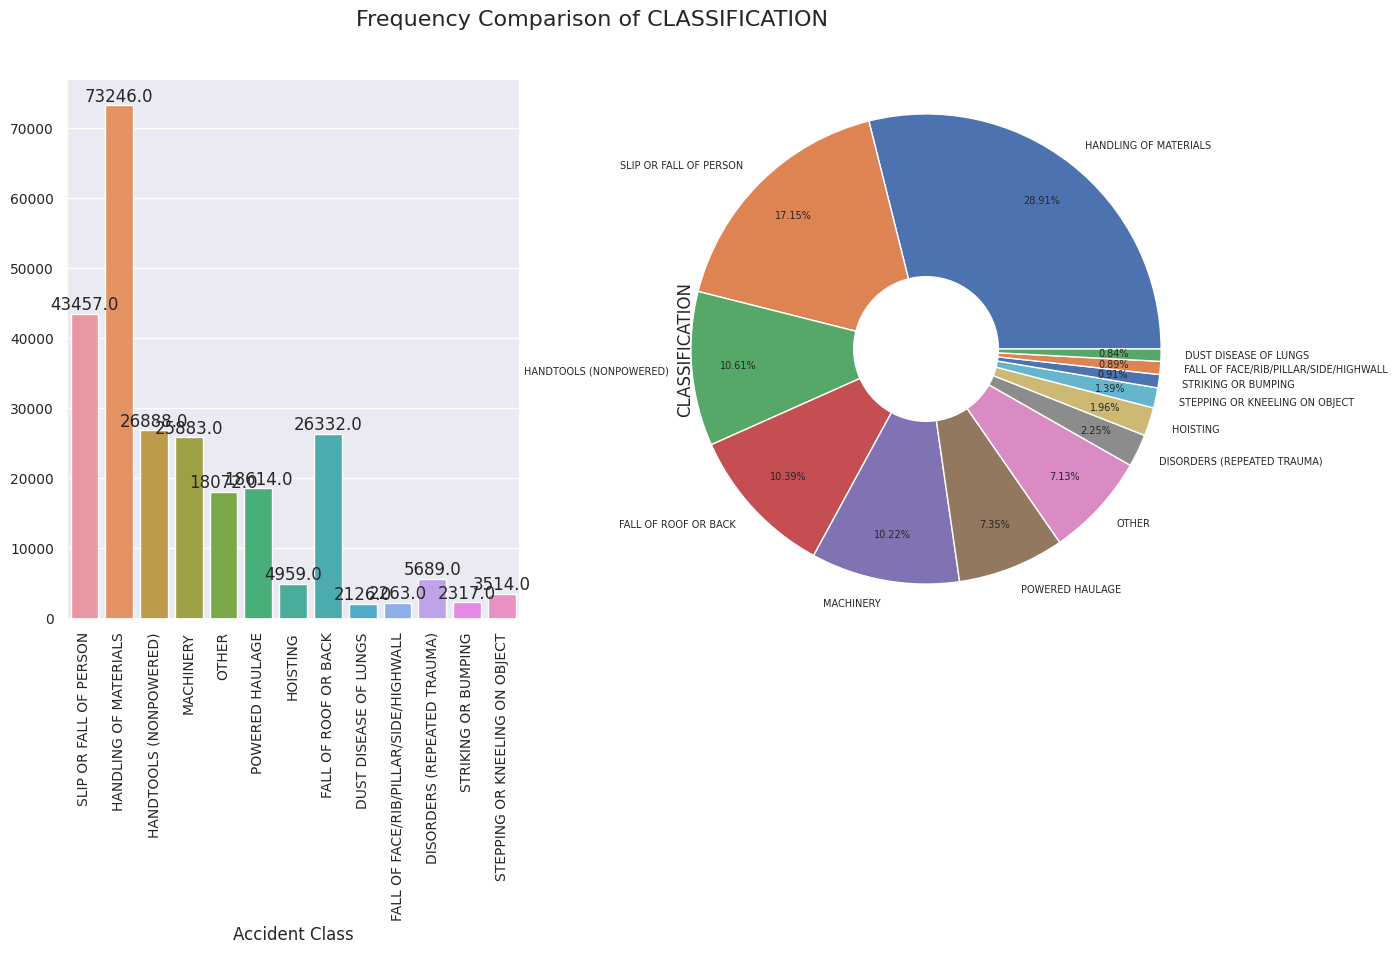

In [ ]:
count_donut(df, 'CLASSIFICATION')

### Time

To examine the distribution of time, we convert the feature from $hh:mm:ss$ format to seconds with the mapping

<h2><center> $hh:mm:ss \to (hh \times 60 \times 60)+(mm \times 60)+ss$. </center></h2>

In [ ]:
# Convert "ACCIDENT_TIME" column to datetime if it's not already in datetime format
df['ACCIDENT_TIME'] = pd.to_datetime(df['ACCIDENT_TIME'], format='%H%M', errors='coerce')

# Extract only the hours and minutes
df['ACCIDENT_TIME'] = df['ACCIDENT_TIME'].dt.strftime('%H:%M')

Under this mapping, the range of time is $0$ to $86400$. We show the convertion for five specific, equispaced time points (the first and last of which are $24$ hours apart, but coincides in the cyclic scale).
- $00:00:00 \to 0$ ($12$ a.m.)
- $06:00:00 \to 21600$ ($6$ a.m.)
- $12:00:00 \to 43200$ ($12$ p.m.)
- $18:00:00 \to 64800$ ($6$ p.m.)
- $24:00:00 \to 86400$ (next day $12$ a.m.)

In the histogram, each bin denotes one-hour time interval, starting from $12$ a.m. We convert the time labels back to the usual notation with a.m. and p.m. for better understanding of the distribution.

In [ ]:
df['ACCIDENT_TIME'].unique()

array(['18:15', nan, '09:00', ..., '06:54', '05:34', '04:21'],
      dtype=object)

In [ ]:
# Function to convert time to seconds
def convert_to_seconds(x):
    if pd.notnull(x):
        if isinstance(x, float):
            x = str(int(x))
        h, m = map(int, x.split(':')[:2])
        return (h * 60 * 60) + (m * 60)
    else:
        return None

# Apply the conversion function to the "ACCIDENT_TIME" column
df['ACCIDENT_TIME'] = df['ACCIDENT_TIME'].apply(convert_to_seconds)


In [ ]:
# Define the classification categories
classifications = {
    'HANDLING OF MATERIALS': df[df['CLASSIFICATION'] == 'HANDLING OF MATERIALS'],
    'SLIP OR FALL OF PERSON': df[df['CLASSIFICATION'] == 'SLIP OR FALL OF PERSON'],
    'HANDTOOLS (NONPOWERED)': df[df['CLASSIFICATION'] == 'HANDTOOLS (NONPOWERED)'],
    'FALL OF ROOF OR BACK': df[df['CLASSIFICATION'] == 'FALL OF ROOF OR BACK'],
    'MACHINERY': df[df['CLASSIFICATION'] == 'MACHINERY'],
    'POWERED HAULAGE': df[df['CLASSIFICATION'] == 'POWERED HAULAGE'],
    'OTHER': df[df['CLASSIFICATION'] == 'OTHER'],
    'DISORDERS (REPEATED TRAUMA)': df[df['CLASSIFICATION'] == 'DISORDERS (REPEATED TRAUMA)'],
    'HOISTING': df[df['CLASSIFICATION'] == 'HOISTING'],
    'STEPPING OR KNEELING ON OBJECT': df[df['CLASSIFICATION'] == 'STEPPING OR KNEELING ON OBJECT'],
    'STRIKING OR BUMPING': df[df['CLASSIFICATION'] == 'STRIKING OR BUMPING'],
    'FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL': df[df['CLASSIFICATION'] == 'FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL'],
    'DUST DISEASE OF LUNGS': df[df['CLASSIFICATION'] == 'DUST DISEASE OF LUNGS']
}

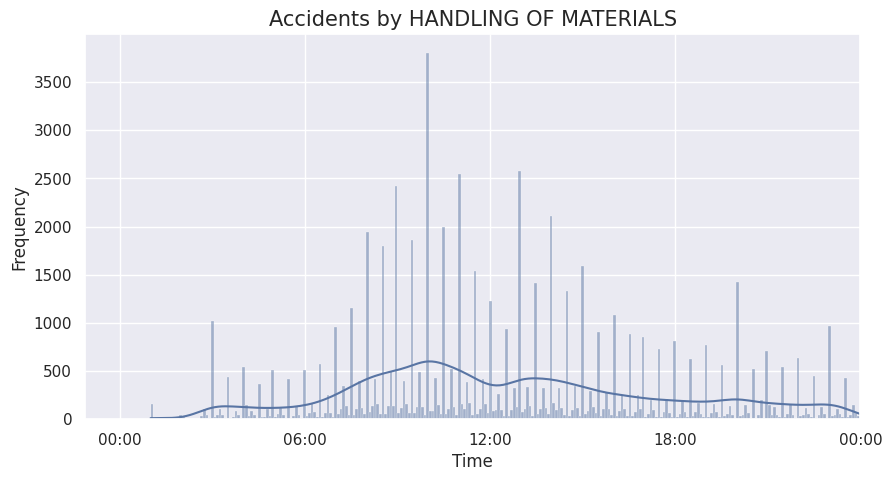

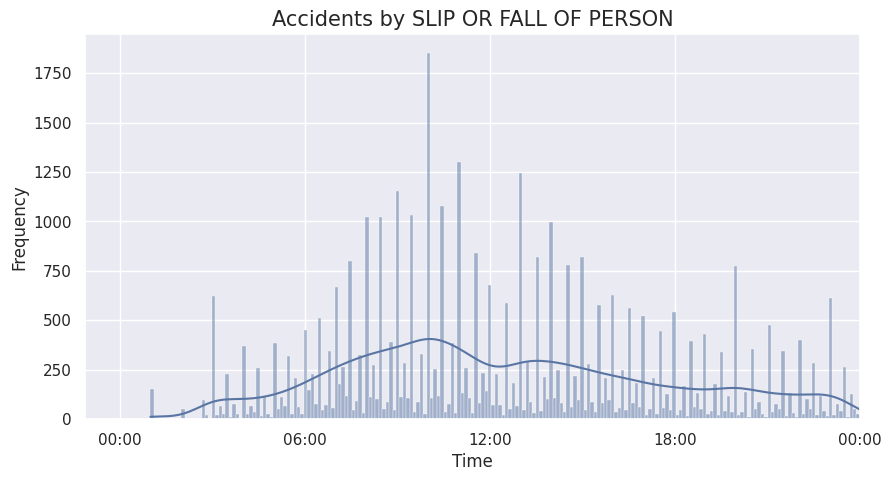

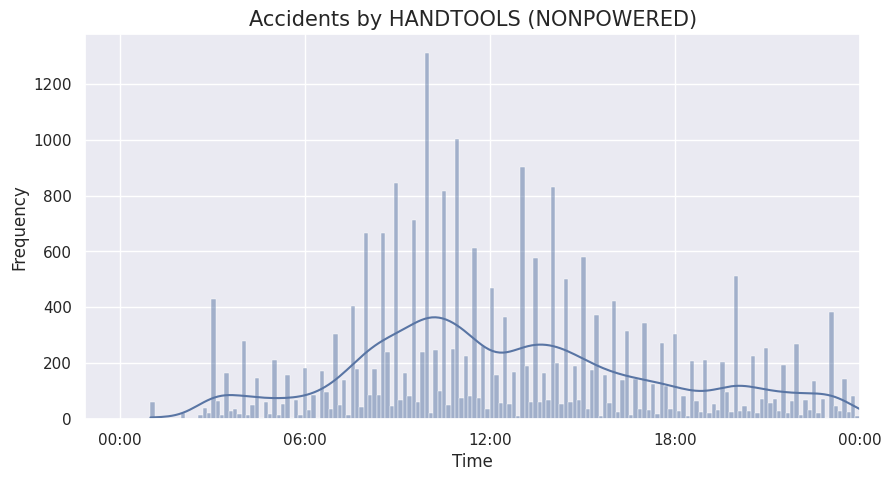

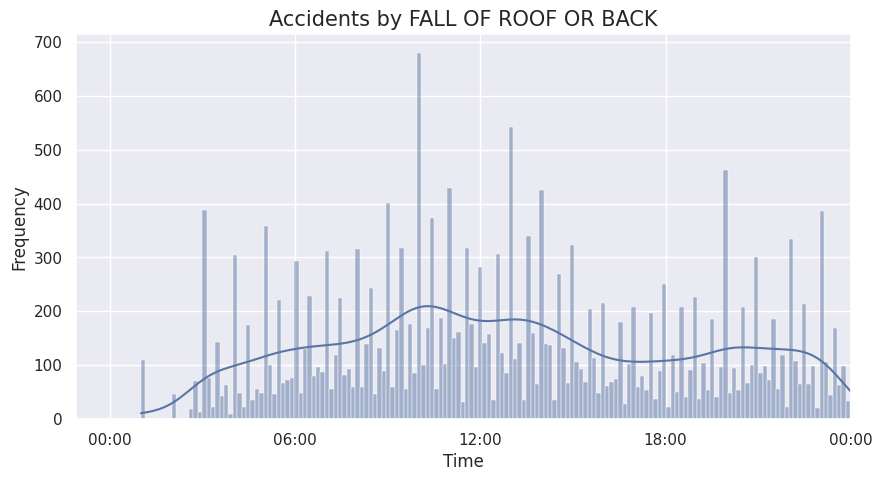

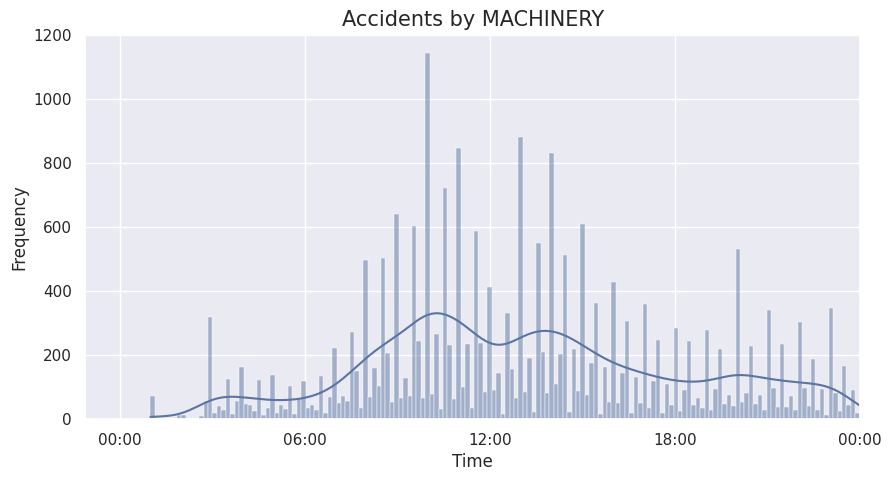

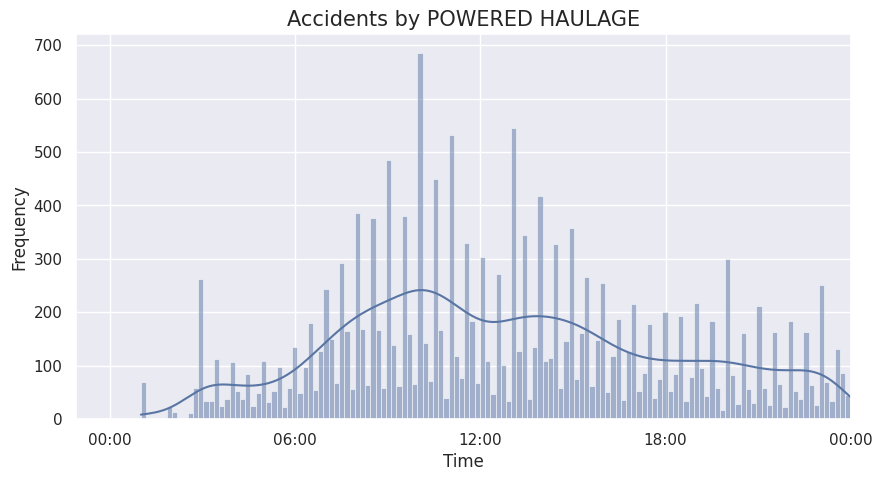

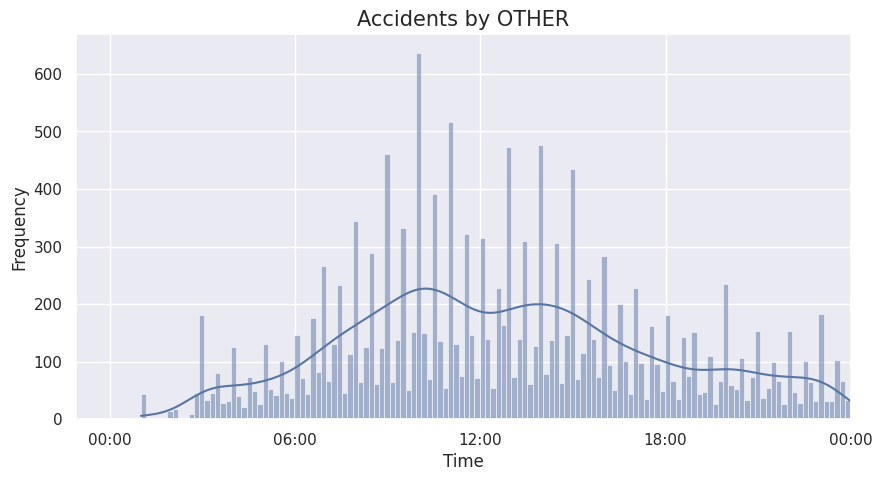

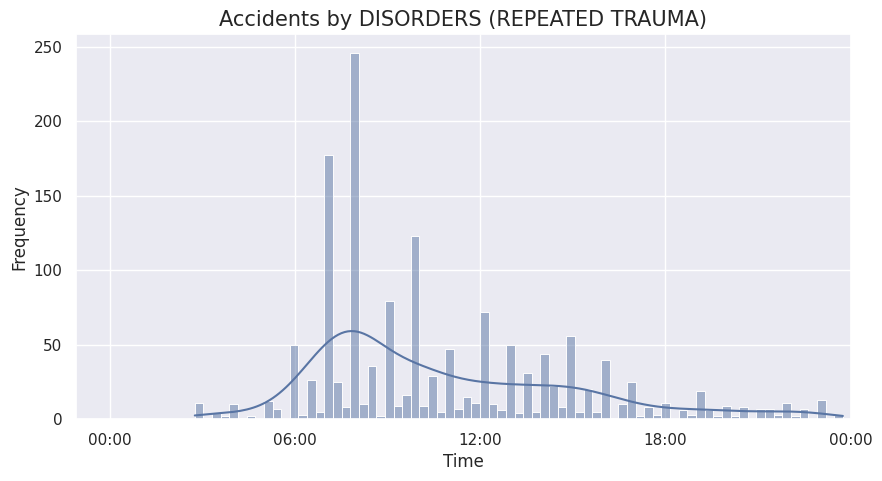

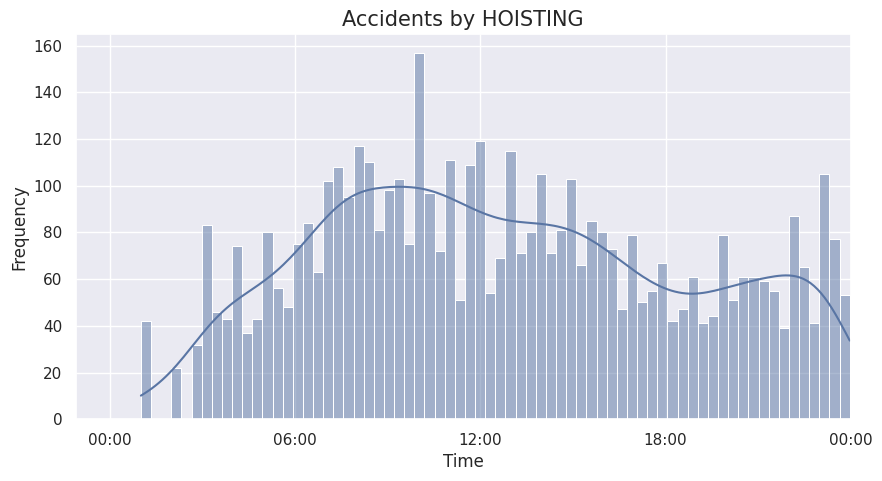

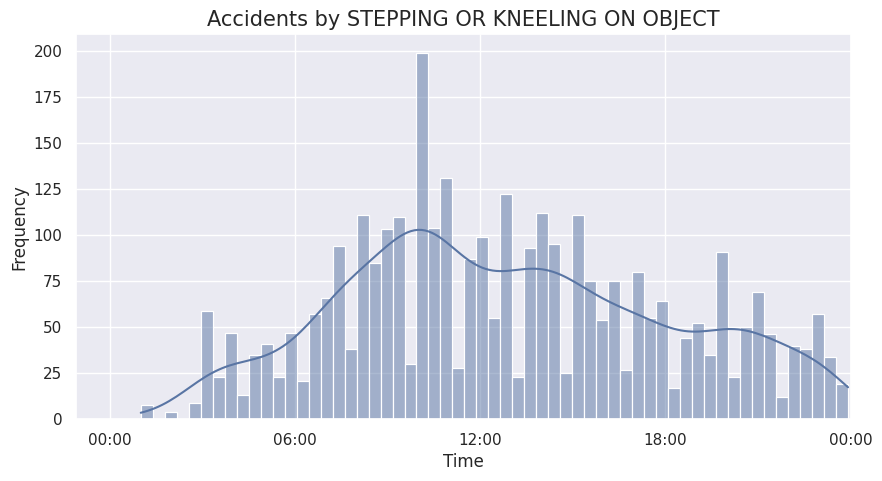

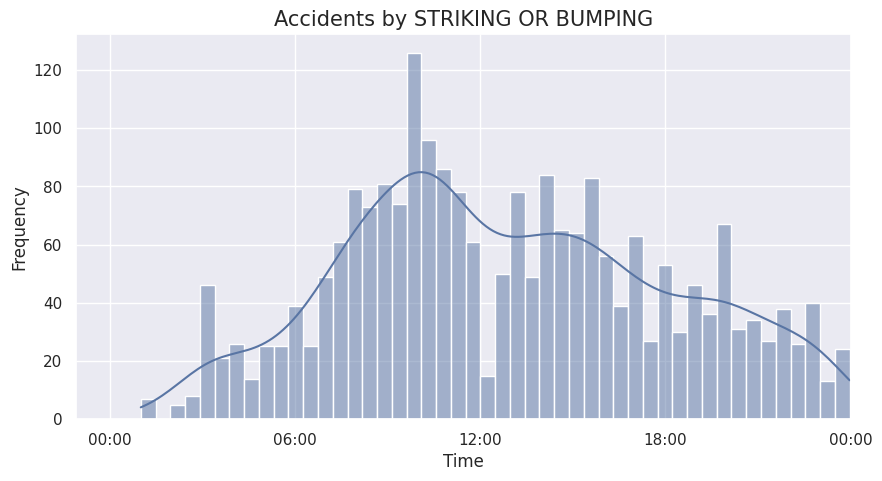

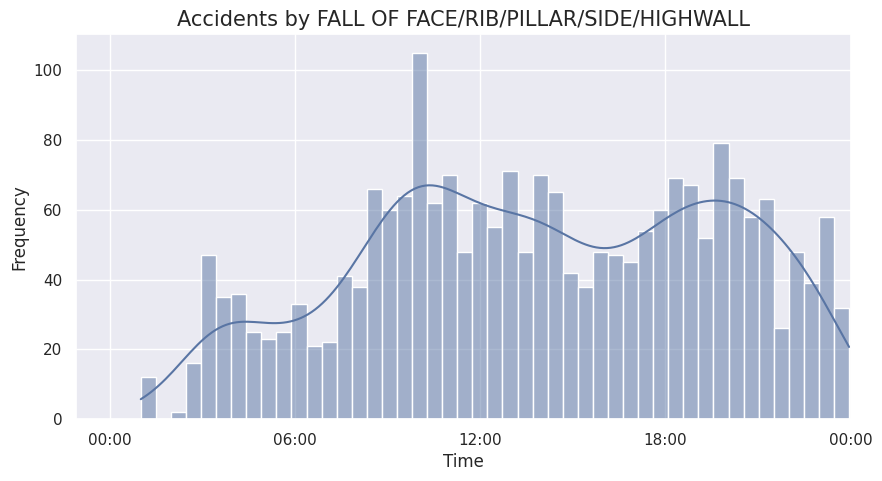

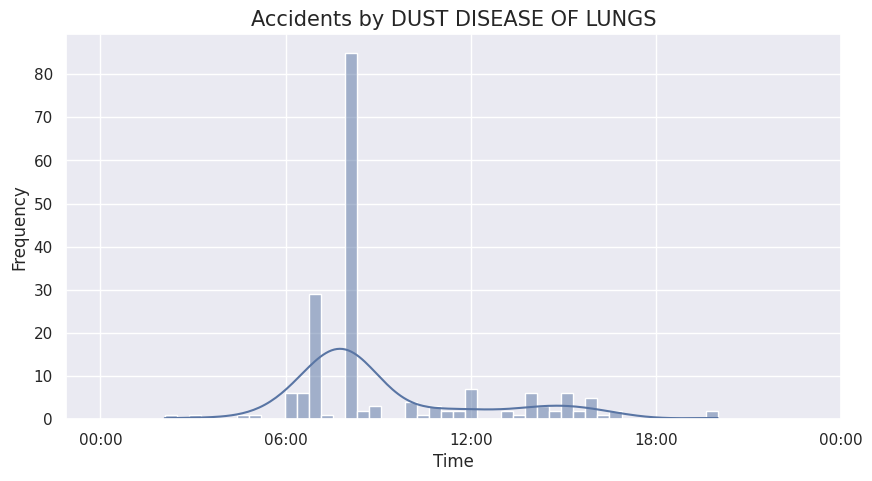

In [ ]:
# Plotting the histograms
for classification, data in classifications.items():
    plt.figure(figsize=(10, 5))
    nbin = int(np.sqrt(len(data)))
    hist = sns.histplot(data, x='ACCIDENT_TIME', color='#5975a4', kde=True, bins=nbin)
    hist.set_title(f"Accidents by {classification}", fontsize=15)
    hist.set_xlim(-4000, 86400)
    hist.set_xticks(np.arange(0, 86500, 21600))
    hist.set_xticklabels(['00:00', '06:00', '12:00', '18:00', '00:00'])
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()
    print("")

The distribution reflects the intuition that there are more accidents in the day time than at night.

# 3. Data Preprocessing

## 3.1. Outlier Detection

<ipython-input-149-4af138a6ee2a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


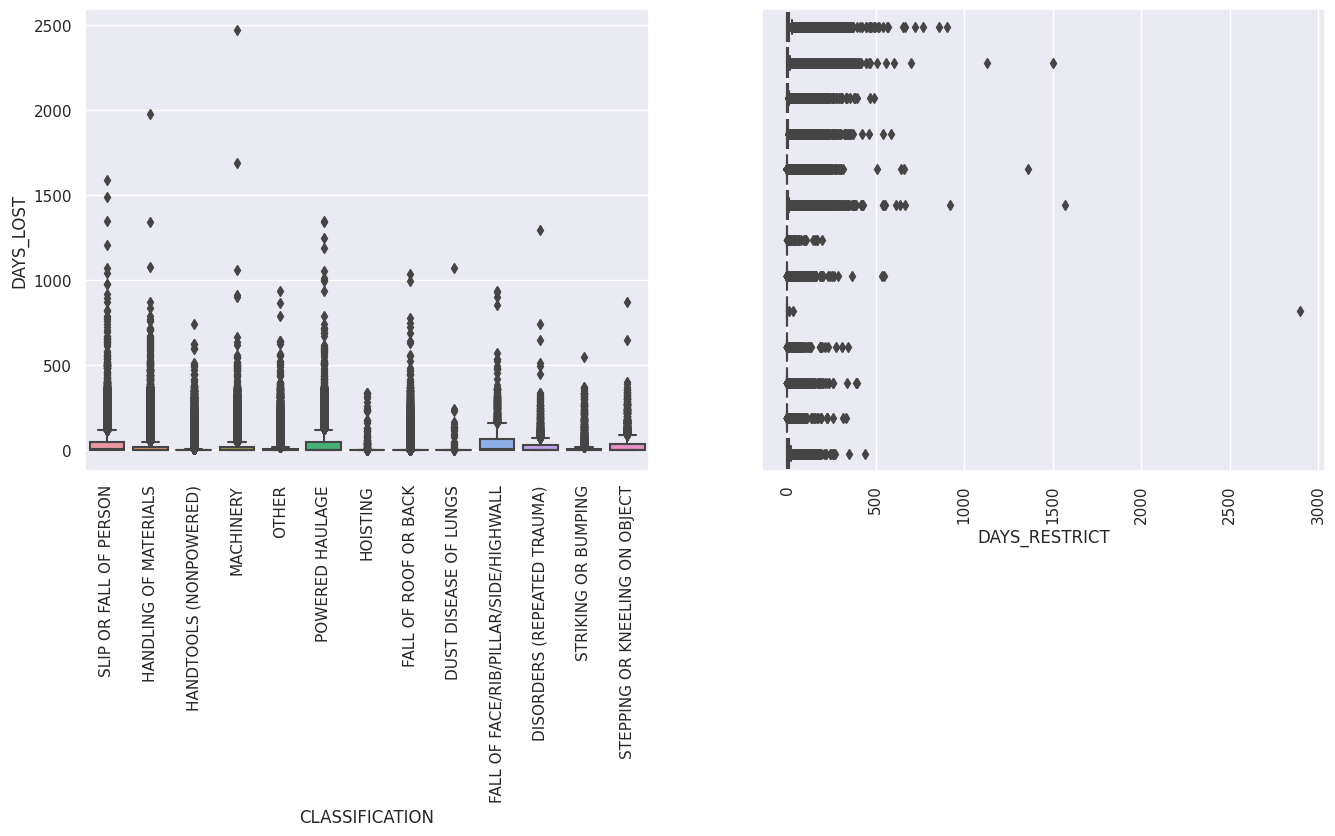

In [ ]:
# Boxplots for outlier detection
df['DAYS_LOST'] = pd.to_numeric(df['DAYS_LOST'], errors='coerce')
df['DAYS_RESTRICT'] = pd.to_numeric(df['DAYS_RESTRICT'], errors='coerce')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='CLASSIFICATION', y='DAYS_LOST', ax=ax1)
sns.boxplot(data=df, x='DAYS_RESTRICT', y='CLASSIFICATION', ax=ax2)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Remove y-axis tick labels from the second subplot
ax2.set(yticklabels=[])

ax2.set_ylabel('')

plt.show()

Despite the appearances of the apparent outliers, **we refrain from deleting or modifying** them as it is evident from the range of the variables that these are most likely to be genuine values, containing relevant information about the corresponding variables.